In [457]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

### Read the CSV

In [458]:
df = pd.read_csv("chexpert_test_predictions.csv")
print(df.columns)
df.head()

Index(['path_to_image', 'path_to_dcm', 'age', 'sex', 'race', 'insurance_type',
       'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices', 'Atelectasis.1', 'Cardiomegaly.1',
       'Consolidation.1', 'Edema.1', 'Effusion'],
      dtype='object')


,path_to_image,path_to_dcm,age,sex,race,insurance_type,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,...,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Atelectasis.1,Cardiomegaly.1,Consolidation.1,Edema.1,Effusion
0,train/patient47347/study3/view1_frontal.jpg,train/patient47347/study3/view1_frontal.dcm,78.0,1,0,1,0,0,1,0,...,0,1,0,1,1,0.280356,0.024607,0.108047,0.551486,0.657590
1,train/patient37527/study12/view1_frontal.jpg,train/patient37527/study12/view1_frontal.dcm,63.0,0,1,2,0,0,0,0,...,0,1,0,0,0,0.257734,0.010331,0.090330,0.406303,0.718315
2,train/patient41208/study9/view1_frontal.jpg,train/patient41208/study9/view1_frontal.dcm,70.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0.093716,0.017031,0.097847,0.215057,0.022786
3,train/patient39357/study1/view1_frontal.jpg,train/patient39357/study1/view1_frontal.dcm,79.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0.105122,0.103289,0.017809,0.503702,0.008354
4,train/patient31982/study4/view1_frontal.jpg,train/patient31982/study4/view1_frontal.dcm,67.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.468974,0.227196,0.197047,0.285252,0.756265


In [459]:
filtered_df = df[df['Cardiomegaly.1'] == 0]
filtered_df

,path_to_image,path_to_dcm,age,sex,race,insurance_type,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,...,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Atelectasis.1,Cardiomegaly.1,Consolidation.1,Edema.1,Effusion
135,valid/patient64593/study1/view1_frontal.jpg,valid/patient64593/study1/view1_frontal.dcm,60.0,0,0,2,1,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
716,valid/patient64587/study1/view1_frontal.jpg,valid/patient64587/study1/view1_frontal.dcm,70.0,0,0,1,0,1,0,0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
1874,valid/patient64541/study1/view1_frontal.jpg,valid/patient64541/study1/view1_frontal.dcm,73.0,0,0,1,0,1,1,1,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2343,valid/patient64642/study1/view1_frontal.jpg,valid/patient64642/study1/view1_frontal.dcm,67.0,1,1,1,0,1,1,1,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
2681,valid/patient64575/study1/view1_frontal.jpg,valid/patient64575/study1/view1_frontal.dcm,80.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3774,valid/patient64546/study1/view1_frontal.jpg,valid/patient64546/study1/view1_frontal.dcm,56.0,0,0,1,0,1,1,1,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
6756,valid/patient64630/study1/view1_frontal.jpg,valid/patient64630/study1/view1_frontal.dcm,60.0,0,0,1,0,1,1,1,...,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
7321,valid/patient64619/study1/view1_frontal.jpg,valid/patient64619/study1/view1_frontal.dcm,83.0,1,1,1,0,1,0,1,...,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
7661,valid/patient64627/study1/view1_frontal.jpg,valid/patient64627/study1/view1_frontal.dcm,29.0,1,1,2,1,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
7712,valid/patient64709/study1/view1_frontal.jpg,valid/patient64709/study1/view1_frontal.dcm,65.0,1,1,1,0,0,0,0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0


### Rename columns

In [460]:
# Rename columns
df.rename(columns={'Cardiomegaly.1': 'Cardiomegaly pred',
                   'Edema.1': 'Edema pred', 'Consolidation.1': 'Consolidation pred',
                   'Atelectasis.1': 'Atelectasis pred', 'Effusion': 'Pleural Effusion pred'}, inplace=True) 
df.head()

,path_to_image,path_to_dcm,age,sex,race,insurance_type,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,...,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Atelectasis pred,Cardiomegaly pred,Consolidation pred,Edema pred,Pleural Effusion pred
0,train/patient47347/study3/view1_frontal.jpg,train/patient47347/study3/view1_frontal.dcm,78.0,1,0,1,0,0,1,0,...,0,1,0,1,1,0.280356,0.024607,0.108047,0.551486,0.657590
1,train/patient37527/study12/view1_frontal.jpg,train/patient37527/study12/view1_frontal.dcm,63.0,0,1,2,0,0,0,0,...,0,1,0,0,0,0.257734,0.010331,0.090330,0.406303,0.718315
2,train/patient41208/study9/view1_frontal.jpg,train/patient41208/study9/view1_frontal.dcm,70.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0.093716,0.017031,0.097847,0.215057,0.022786
3,train/patient39357/study1/view1_frontal.jpg,train/patient39357/study1/view1_frontal.dcm,79.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0.105122,0.103289,0.017809,0.503702,0.008354
4,train/patient31982/study4/view1_frontal.jpg,train/patient31982/study4/view1_frontal.dcm,67.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.468974,0.227196,0.197047,0.285252,0.756265


### Remove columns

In [461]:
df = df.drop(columns=['path_to_image', 'path_to_dcm'])
df.head()


,age,sex,race,insurance_type,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,...,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Atelectasis pred,Cardiomegaly pred,Consolidation pred,Edema pred,Pleural Effusion pred
0,78.0,1,0,1,0,0,1,0,0,1,...,0,1,0,1,1,0.280356,0.024607,0.108047,0.551486,0.657590
1,63.0,0,1,2,0,0,0,0,0,0,...,0,1,0,0,0,0.257734,0.010331,0.090330,0.406303,0.718315
2,70.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0.093716,0.017031,0.097847,0.215057,0.022786
3,79.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0.105122,0.103289,0.017809,0.503702,0.008354
4,67.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.468974,0.227196,0.197047,0.285252,0.756265


### Remove rows that were not processed (all = 0)

In [462]:
initial_size = df.shape[0] 
# Select columns where column names end with 'pred'
pred_columns = df.filter(regex='pred$').columns

# Remove rows where all values in these 'pred' columns are zero
df = df[~(df[pred_columns] == 0).all(axis=1)]
final_size = df.shape[0] 

print(f'Number of removed rows = {initial_size - final_size}')

Number of removed rows = 51


### Set the disease accoring to a threashold

In [463]:
p = 0.5

df_labels = df.copy()

# Apply conversion to 0 or 1 based on the threshold
df_labels[pred_columns] = df[pred_columns].apply(lambda x: (x > p).astype(int))

df_labels.head()

,age,sex,race,insurance_type,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,...,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Atelectasis pred,Cardiomegaly pred,Consolidation pred,Edema pred,Pleural Effusion pred
0,78.0,1,0,1,0,0,1,0,0,1,...,0,1,0,1,1,0,0,0,1,1
1,63.0,0,1,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,70.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,79.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,67.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### Create a no finding pred column

In [464]:
# It will be 1 if all values in 'pred' columns are 0 for a row, and 0 otherwise
df['No Finding pred'] = (df_labels[pred_columns] == 0).all(axis=1).astype(int)
df.head()

,age,sex,race,insurance_type,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,...,Pleural Effusion,Pleural Other,Fracture,Support Devices,Atelectasis pred,Cardiomegaly pred,Consolidation pred,Edema pred,Pleural Effusion pred,No Finding pred
0,78.0,1,0,1,0,0,1,0,0,1,...,1,0,1,1,0.280356,0.024607,0.108047,0.551486,0.657590,0
1,63.0,0,1,2,0,0,0,0,0,0,...,1,0,0,0,0.257734,0.010331,0.090330,0.406303,0.718315,0
2,70.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0.093716,0.017031,0.097847,0.215057,0.022786,1
3,79.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0.105122,0.103289,0.017809,0.503702,0.008354,0
4,67.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.468974,0.227196,0.197047,0.285252,0.756265,0


### Predictions

In [465]:
df.columns

Index(['age', 'sex', 'race', 'insurance_type', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices', 'Atelectasis pred', 'Cardiomegaly pred',
       'Consolidation pred', 'Edema pred', 'Pleural Effusion pred',
       'No Finding pred'],
      dtype='object')

In [466]:
def compute_metrics(y_true, y_pred):
    # Threshold predictions to create binary classification
    y_pred_bin = (y_pred > 0.5).astype(int)
    
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_bin).ravel()
    
    # Calculate rates
    tp_rate = tp / (tp + fn) if (tp + fn) else 0
    fp_rate = fp / (fp + tn) if (fp + tn) else 0
    tn_rate = tn / (tn + fp) if (tn + fp) else 0
    fn_rate = fn / (fn + tp) if (fn + tp) else 0
    
    return {
        'Accuracy': accuracy_score(y_true, y_pred_bin),
        'Precision': precision_score(y_true, y_pred_bin, zero_division=0),
        'AUC': roc_auc_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred_bin),
        'TP Rate': tp_rate,
        'FP Rate': fp_rate,
        'TN Rate': tn_rate,
        'FN Rate': fn_rate
    }



# List of diseases
diseases = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion', 'No Finding']



In [467]:
# Compute metrics for each disease
results = {}
for disease in diseases:
    pred_column = disease + ' pred'
    if pred_column in df.columns:  # Check if prediction column exists
        metrics = compute_metrics(df[disease], df[pred_column])
        results[disease] = metrics

# Display or plot overall metrics
for disease, metrics in results.items():
    print(f"{disease}: {metrics}")


Atelectasis: {'Accuracy': 0.8430049371076984, 'Precision': 0.40214067278287463, 'AUC': 0.6735877461537079, 'F1 Score': 0.07674350744091042, 'TP Rate': 0.04241935483870968, 'FP Rate': 0.01146392236197848, 'TN Rate': 0.9885360776380215, 'FN Rate': 0.9575806451612904}
Cardiomegaly: {'Accuracy': 0.896196690401171, 'Precision': 0.6971544715447154, 'AUC': 0.8774417537373707, 'F1 Score': 0.3960739030023095, 'TP Rate': 0.27661290322580645, 'FP Rate': 0.016861402665006932, 'TN Rate': 0.9831385973349931, 'FN Rate': 0.7233870967741935}
Consolidation: {'Accuracy': 0.9381000818716352, 'Precision': 0.4166666666666667, 'AUC': 0.7604791220463047, 'F1 Score': 0.003992015968063873, 'TP Rate': 0.0020056157240272766, 'FP Rate': 0.00018511662347278786, 'TN Rate': 0.9998148833765272, 'FN Rate': 0.9979943842759728}
Edema: {'Accuracy': 0.7985213486491181, 'Precision': 0.5719411223551057, 'AUC': 0.8469473899049907, 'F1 Score': 0.6049136463147653, 'TP Rate': 0.6419204956117708, 'FP Rate': 0.15194957873424336, '

In [468]:
# Compute AUC for each disease
auc = {}
for disease in diseases:
    pred_column = disease + ' pred'
    if pred_column in df.columns:  # Check if prediction column exists
        metrics = compute_metrics(df[disease], df[pred_column])
        auc[disease] = metrics['AUC']

print("General AUC:", auc)


General AUC: {'Atelectasis': 0.6735877461537079, 'Cardiomegaly': 0.8774417537373707, 'Consolidation': 0.7604791220463047, 'Edema': 0.8469473899049907, 'Pleural Effusion': 0.8900734145988148, 'No Finding': 0.7094931635910073}


In [469]:
true_results_chexpert = {
    "Atelectasis": 0.93,
    "Consolidation": 0.91,
    "Edema": 0.92,
    "Pleural Effusion": 0.96,
    "Cardiomegaly": 0.91
}


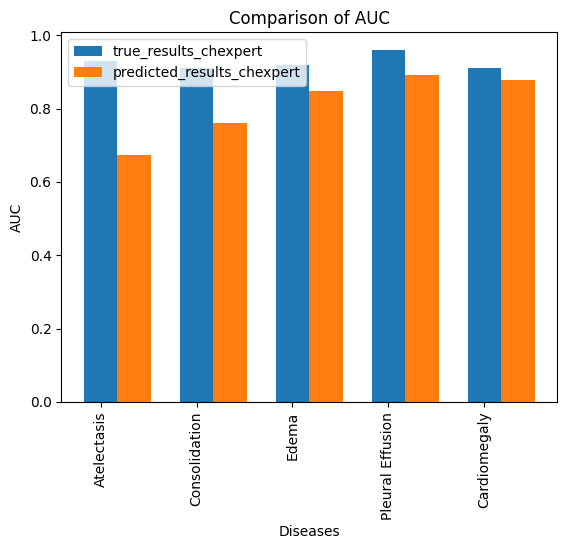

In [470]:

# Extract diseases and AUC values
diseases = list(true_results_chexpert.keys())
values1 = [true_results_chexpert[disease] for disease in diseases]
values2 = [auc[disease] for disease in diseases]


# Setting the positions and width for the bars
positions = np.arange(len(diseases))
bar_width = 0.35

# Plotting the bars
fig, ax = plt.subplots()
bar1 = ax.bar(positions, values1, width=bar_width, label='true_results_chexpert')
bar2 = ax.bar(positions + bar_width, values2, width=bar_width, label='predicted_results_chexpert')


# Adding some text for labels, title, and axes ticks
ax.set_xlabel('Diseases')
ax.set_ylabel('AUC')
ax.set_title('Comparison of AUC')
ax.set_xticks(positions)
ax.set_xticklabels(diseases, rotation='vertical')  # Rotating labels vertically
ax.legend()

# Show the plot
plt.show()


### Study one metric

In [471]:
met = 'Accuracy'
diseases = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion', 'No Finding']


In [472]:
# Compute metrics for each disease
auc = {}
for disease in diseases:
    pred_column = disease + ' pred'
    if pred_column in df.columns:  # Check if prediction column exists
        metrics = compute_metrics(df[disease], df[pred_column])
        auc[disease] = metrics[met]

print(f"General {met}", auc)

General Accuracy {'Atelectasis': 0.8430049371076984, 'Cardiomegaly': 0.896196690401171, 'Consolidation': 0.9381000818716352, 'Edema': 0.7985213486491181, 'Pleural Effusion': 0.7846031706651451, 'No Finding': 0.5452899000173667}


In [473]:
# Initialize dictionaries to store AUC values
auc_female = {}
auc_male = {}

# Filter DataFrame by sex and compute AUC for each disease
for sex, auc_dict in [(1, auc_female), (0, auc_male)]:
    df_sex = df[df['sex'] == sex]
    for disease in diseases:
        pred_column = disease + ' pred'
        if pred_column in df_sex.columns:
            metrics = compute_metrics(df_sex[disease], df_sex[pred_column])
            auc_dict[disease] = metrics[met]

# Output results
print(f"{met} for Females: {auc_female}")
print(f"{met} for Males: {auc_male}")


Accuracy for Females: {'Atelectasis': 0.849255143059825, 'Cardiomegaly': 0.9016907070229369, 'Consolidation': 0.9408843698273823, 'Edema': 0.7958737290139513, 'Pleural Effusion': 0.7946323007803263, 'No Finding': 0.5447505320406716}
Accuracy for Males: {'Atelectasis': 0.8384848873498354, 'Cardiomegaly': 0.8922235047667907, 'Consolidation': 0.9360865290068829, 'Edema': 0.800436065153264, 'Pleural Effusion': 0.7773502629216366, 'No Finding': 0.5456799623786927}


In [474]:
# Initialize dictionaries to store AUC values
auc_white = {}
auc_black = {}
auc_asian = {}

# Filter DataFrame by sex and compute AUC for each disease
for race, auc_dict in [(0, auc_white), (1, auc_asian), (2, auc_black)]: 
    df_race = df[df['race'] == race]
    for disease in diseases:
        pred_column = disease + ' pred'
        if pred_column in df_sex.columns:
            metrics = compute_metrics(df_race[disease], df_race[pred_column])
            auc_dict[disease] = metrics[met]

# Output results
print(f"{met} for W: {auc_white}")
print(f"{met} for B: {auc_black}")
print(f"{met} for A: {auc_asian}")


Accuracy for W: {'Atelectasis': 0.8383187946074544, 'Cardiomegaly': 0.9009357652656622, 'Consolidation': 0.9382394924662966, 'Edema': 0.79847739888977, 'Pleural Effusion': 0.7815701823949247, 'No Finding': 0.5448374306106265}
Accuracy for B: {'Atelectasis': 0.8645362973254602, 'Cardiomegaly': 0.8454324418200764, 'Consolidation': 0.942341090656478, 'Edema': 0.7603334491142758, 'Pleural Effusion': 0.8100034734282737, 'No Finding': 0.5748523792983675}
Accuracy for A: {'Atelectasis': 0.8575300694562087, 'Cardiomegaly': 0.8956462815517533, 'Consolidation': 0.9352871421311197, 'Edema': 0.8173809927155683, 'Pleural Effusion': 0.7884126715229545, 'No Finding': 0.5332881585634424}


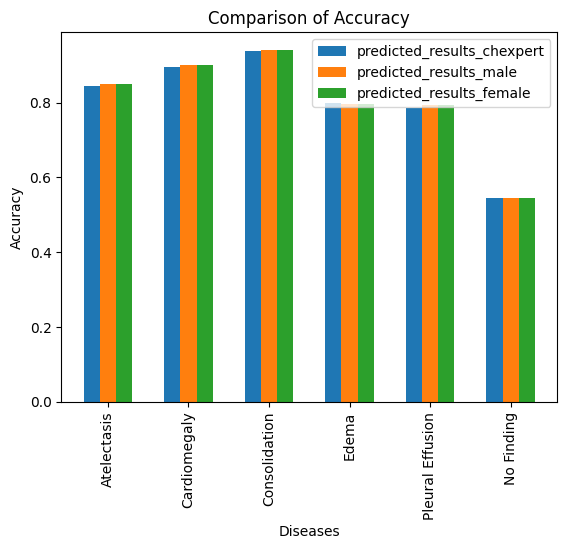

In [475]:

# Extract diseases and AUC values
diseases = list(auc.keys())
values2 = [auc[disease] for disease in diseases]
values_male = [auc_female[disease] for disease in diseases]
values_female = [auc_female[disease] for disease in diseases]

# Setting the positions and width for the bars
positions = np.arange(len(diseases))
bar_width = 0.2

# Plotting the bars
fig, ax = plt.subplots()
bar2 = ax.bar(positions - bar_width, values2, width=bar_width, label='predicted_results_chexpert')
bar3 = ax.bar(positions, values_male, width=bar_width, label='predicted_results_male')
bar4 = ax.bar(positions + bar_width, values_female, width=bar_width, label='predicted_results_female')


# Adding some text for labels, title, and axes ticks
ax.set_xlabel('Diseases')
ax.set_ylabel(met)
ax.set_title(f'Comparison of {met}')
ax.set_xticks(positions)
ax.set_xticklabels(diseases, rotation='vertical')  # Rotating labels vertically
ax.legend()

# Show the plot
plt.show()


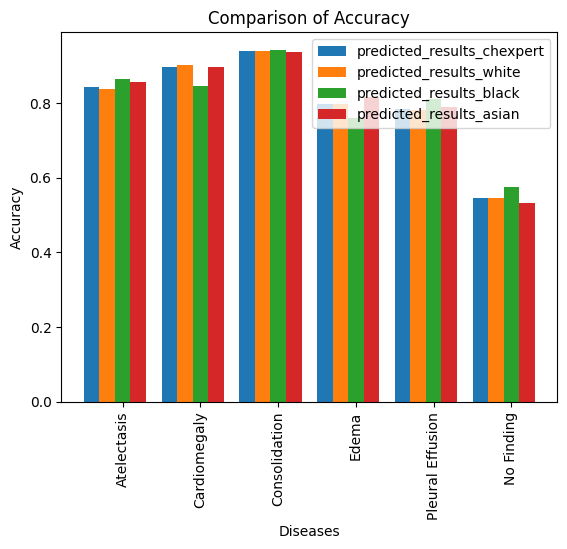

In [476]:

# Extract diseases and AUC values
diseases = list(auc.keys())
values2 = [auc[disease] for disease in diseases]
values_white = [auc_white[disease] for disease in diseases]
values_black = [auc_black[disease] for disease in diseases]
values_asian = [auc_asian[disease] for disease in diseases]

# Setting the positions and width for the bars
positions = np.arange(len(diseases))
bar_width = 0.2

# Plotting the bars
fig, ax = plt.subplots()
bar2 = ax.bar(positions - 2*bar_width, values2, width=bar_width, label='predicted_results_chexpert')
bar3 = ax.bar(positions - bar_width, values_white, width=bar_width, label='predicted_results_white')
bar4 = ax.bar(positions, values_black, width=bar_width, label='predicted_results_black')
bar5 = ax.bar(positions + bar_width, values_asian, width=bar_width, label='predicted_results_asian')


# Adding some text for labels, title, and axes ticks
ax.set_xlabel('Diseases')
ax.set_ylabel(met)
ax.set_title(f'Comparison of {met}')
ax.set_xticks(positions)
ax.set_xticklabels(diseases, rotation='vertical')  # Rotating labels vertically
ax.legend()

# Show the plot
plt.show()
